In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bill_authentication.csv')
X = data.iloc[:,[2,3]]
y = data.iloc[:,[4]].values
Y = np.ravel(y)

In [3]:
data.shape

(1372, 5)

In [4]:
data.head().T

,0,1,2,3,4
Variance,3.62160,4.5459,3.86600,3.4566,0.32924
Skewness,8.66610,8.1674,-2.63830,9.5228,-4.45520
Curtosis,-2.80730,-2.4586,1.92420,-4.0112,4.57180
Entropy,-0.44699,-1.4621,0.10645,-3.5944,-0.98880
Class,0.00000,0.0000,0.00000,0.0000,0.00000


In [6]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


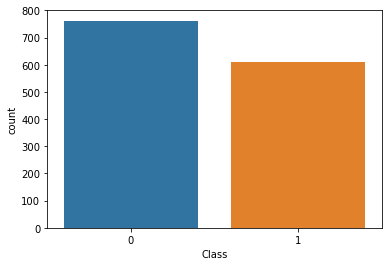

In [20]:
import seaborn as sns
sns.countplot(x = "Class", data = data);

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
print('Size of X_train:', X_train.shape)
print('Size of X_test:', X_test.shape)
print('Size of Y_train:', Y_train.shape)
print('Size of Y_test:', X_test.shape)

Size of X_train: (1097, 2)
Size of X_test: (275, 2)
Size of Y_train: (1097,)
Size of Y_test: (275, 2)


In [11]:
X_train.head().T

,1326,1109,1139,657,704
Curtosis,-0.84085,-2.9607,5.75680,-3.1338,-1.85110
Entropy,-2.03230,-2.6892,0.87325,-2.5276,-0.12889


In [12]:
X_train.describe()

,Curtosis,Entropy
count,1097.000000,1097.000000
mean,1.385735,-1.174015
std,4.247798,2.088414
min,-5.286100,-7.785300
25%,-1.491200,-2.372400
50%,0.562650,-0.562100
75%,3.176900,0.394810
max,17.927400,2.449500


In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [41]:
pred_y = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)

In [43]:
print(cm)

[[121  36]
 [ 58  60]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       157
           1       0.68      0.49      0.57       118

    accuracy                           0.68       275
   macro avg       0.68      0.66      0.66       275
weighted avg       0.68      0.68      0.67       275



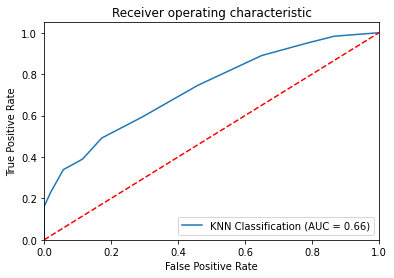

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Area_Under_Curve = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classification (AUC = %0.2f)' % Area_Under_Curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()